## Cleaning the historical price dataset
In this part we will clean and prepare Cardano's historical price dataset. We will use the dataset that was scraped from Binance' API in the previous notebook. We will locate missing data remove some of the non-informative features and prepare the dataset for further feauture extraction and analysis.

In [29]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset
raw = pd.read_csv("ADAUSDT-1h-data.csv")

raw

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,2018-04-17 04:00:00,0.25551,0.28800,0.25551,0.26664,8.143693e+06,1523941199999,2.165077e+06,4421,2889823.93,7.671342e+05,0
1,2018-04-17 05:00:00,0.26660,0.27798,0.26010,0.26200,8.317924e+06,1523944799999,2.235633e+06,5149,3819527.71,1.025247e+06,0
2,2018-04-17 06:00:00,0.26221,0.26396,0.24800,0.25664,8.420095e+06,1523948399999,2.153964e+06,4566,3636154.31,9.302932e+05,0
3,2018-04-17 07:00:00,0.25662,0.26300,0.25489,0.25698,4.686044e+06,1523951999999,1.215621e+06,3283,1633201.94,4.234452e+05,0
4,2018-04-17 08:00:00,0.25636,0.25998,0.25229,0.25631,3.510038e+06,1523955599999,8.960957e+05,2408,1349216.91,3.444861e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26940,2021-05-16 18:00:00,2.23440,2.25380,2.12000,2.12760,5.547259e+07,1621191599999,1.212629e+08,159310,26216860.86,5.737470e+07,0
26941,2021-05-16 19:00:00,2.12710,2.16510,2.02000,2.09120,1.150937e+08,1621195199999,2.417720e+08,223820,54761723.02,1.151248e+08,0
26942,2021-05-16 20:00:00,2.09170,2.12320,2.01040,2.02620,8.895247e+07,1621198799999,1.837397e+08,181026,45234577.00,9.348864e+07,0
26943,2021-05-16 21:00:00,2.02690,2.19930,2.02320,2.16890,9.072420e+07,1621202399999,1.922008e+08,162276,46606515.94,9.874744e+07,0


In [30]:
# The dataset contains an error with double rows with the same date and time, we will remove it here
for i, time in enumerate(raw["timestamp"]):
    if i == len(raw):
        break
    if raw['timestamp'][i+1] == time:
        raw.drop(i, axis = 0, inplace = True)
        i+=1
raw

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,2018-04-17 04:00:00,0.25551,0.28800,0.25551,0.26664,8.143693e+06,1523941199999,2.165077e+06,4421,2889823.93,7.671342e+05,0
1,2018-04-17 05:00:00,0.26660,0.27798,0.26010,0.26200,8.317924e+06,1523944799999,2.235633e+06,5149,3819527.71,1.025247e+06,0
2,2018-04-17 06:00:00,0.26221,0.26396,0.24800,0.25664,8.420095e+06,1523948399999,2.153964e+06,4566,3636154.31,9.302932e+05,0
3,2018-04-17 07:00:00,0.25662,0.26300,0.25489,0.25698,4.686044e+06,1523951999999,1.215621e+06,3283,1633201.94,4.234452e+05,0
4,2018-04-17 08:00:00,0.25636,0.25998,0.25229,0.25631,3.510038e+06,1523955599999,8.960957e+05,2408,1349216.91,3.444861e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26940,2021-05-16 18:00:00,2.23440,2.25380,2.12000,2.12760,5.547259e+07,1621191599999,1.212629e+08,159310,26216860.86,5.737470e+07,0
26941,2021-05-16 19:00:00,2.12710,2.16510,2.02000,2.09120,1.150937e+08,1621195199999,2.417720e+08,223820,54761723.02,1.151248e+08,0
26942,2021-05-16 20:00:00,2.09170,2.12320,2.01040,2.02620,8.895247e+07,1621198799999,1.837397e+08,181026,45234577.00,9.348864e+07,0
26943,2021-05-16 21:00:00,2.02690,2.19930,2.02320,2.16890,9.072420e+07,1621202399999,1.922008e+08,162276,46606515.94,9.874744e+07,0


In [31]:
# First we will remove the ignore and close_time column
raw.drop(['ignore'], axis = 1, inplace = True)
raw = raw.drop(['close_time'], axis = 1).reset_index(drop = True)

# Next we will add a column with the corresponding time expressed in UNIX EPOCH.
unix = np.array([], dtype = np.int16)
for i in range(len(raw)):
    unix = np.append(unix, (pd.Timestamp((raw.iloc[i,0])) - pd.Timestamp("1970-01-01 00:00:00")) // pd.Timedelta('1s'))
    
new_column =  pd.DataFrame({"unix": unix})
raw = pd.concat((raw, new_column), axis = 1)
raw = raw[raw["unix"] < 1621198801]
# We will remove instances corresponding with maintenance breaks, we assume that those instances include values of 0 for trade and volume.
print(len(raw))
raw = raw[raw['trades'] != 0].reset_index(drop = True)
print(len(raw))
raw

26938
26935


,timestamp,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av,unix
0,2018-04-17 04:00:00,0.25551,0.28800,0.25551,0.26664,8.143693e+06,2.165077e+06,4421,2889823.93,7.671342e+05,1523937600
1,2018-04-17 05:00:00,0.26660,0.27798,0.26010,0.26200,8.317924e+06,2.235633e+06,5149,3819527.71,1.025247e+06,1523941200
2,2018-04-17 06:00:00,0.26221,0.26396,0.24800,0.25664,8.420095e+06,2.153964e+06,4566,3636154.31,9.302932e+05,1523944800
3,2018-04-17 07:00:00,0.25662,0.26300,0.25489,0.25698,4.686044e+06,1.215621e+06,3283,1633201.94,4.234452e+05,1523948400
4,2018-04-17 08:00:00,0.25636,0.25998,0.25229,0.25631,3.510038e+06,8.960957e+05,2408,1349216.91,3.444861e+05,1523952000
...,...,...,...,...,...,...,...,...,...,...,...
26930,2021-05-16 17:00:00,2.23770,2.25000,2.15000,2.23510,7.546962e+07,1.663078e+08,167738,36306830.73,8.006313e+07,1621184400
26931,2021-05-16 18:00:00,2.23440,2.25380,2.12000,2.12760,5.547259e+07,1.212629e+08,159310,26216860.86,5.737470e+07,1621188000
26932,2021-05-16 19:00:00,2.12710,2.16510,2.02000,2.09120,1.150937e+08,2.417720e+08,223820,54761723.02,1.151248e+08,1621191600
26933,2021-05-16 20:00:00,2.09170,2.12320,2.01040,2.02620,8.895247e+07,1.837397e+08,181026,45234577.00,9.348864e+07,1621195200


In [32]:
# Now we will check for the amount of missing data.
AMOUNT_MISSING_DATA = (unix[-1] - unix[0]) / (60*60) - len(raw)
print(f"The number of missing instances is {AMOUNT_MISSING_DATA}, This is {round(AMOUNT_MISSING_DATA / len(raw), 5)}% of the total dataset.")

# While the share of missing instances is considerably low and the missing instances can be explained by corresponding maintenance breaks,
# we will leave the missing instances out of the dataset.

TOTAL_NR_INSTANCES = len(raw)
INSTANCES_THEORETICAL = (raw['unix'].iloc[-1] - raw['unix'].iloc[0]) / 60 / 60

print(f"Number of missing instances (due to maintenance): {INSTANCES_THEORETICAL - TOTAL_NR_INSTANCES}, percentage ==> {round(1 - (TOTAL_NR_INSTANCES / INSTANCES_THEORETICAL), 4) }%")
INSTANCES_THEORETICAL

The number of missing instances is 83.0, This is 0.00308% of the total dataset.
Number of missing instances (due to maintenance): 82.0, percentage ==> 0.003%


27017.0

In [33]:
raw.corr()

,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av,unix
open,1.000000,0.999885,0.999862,0.999805,0.322152,0.687964,0.725796,0.320493,0.675102,0.476052
high,0.999885,1.000000,0.999788,0.999909,0.327736,0.694565,0.731797,0.326570,0.682230,0.476133
low,0.999862,0.999788,1.000000,0.999873,0.317193,0.682549,0.720515,0.316105,0.670341,0.475964
close,0.999805,0.999909,0.999873,1.000000,0.323413,0.689677,0.727167,0.322558,0.677718,0.476140
volume,0.322152,0.327736,0.317193,0.323413,1.000000,0.657232,0.689439,0.993068,0.654542,0.427827
quote_av,0.687964,0.694565,0.682549,0.689677,0.657232,1.000000,0.964365,0.662649,0.997390,0.377202
trades,0.725796,0.731797,0.720515,0.727167,0.689439,0.964365,1.000000,0.691743,0.959283,0.432423
tb_base_av,0.320493,0.326570,0.316105,0.322558,0.993068,0.662649,0.691743,1.000000,0.664632,0.418508
tb_quote_av,0.675102,0.682230,0.670341,0.677718,0.654542,0.997390,0.959283,0.664632,1.000000,0.369191
unix,0.476052,0.476133,0.475964,0.476140,0.427827,0.377202,0.432423,0.418508,0.369191,1.000000


## Extracting features
In this part we will use some technical financial measures to extract features from the current 'clean' dataset. 

In [34]:
# We will make a new dataframe with the extracted features.
extracted_features = pd.DataFrame([])

# First we will start with volatility and return. Return will be the y-variable of this prediction task.
extracted_features["volatility"] = abs(raw["high"] - raw["low"])
returns = np.append(raw["close"], np.zeros(1)) - np.append(np.zeros(1), raw["close"])
extracted_features["return"] = returns[:-1]
extracted_features["return"].iloc[0] = raw['close'].iloc[0] - raw['open'].iloc[0] 
extracted_features

,volatility,return
0,0.03249,0.01113
1,0.01788,-0.00464
2,0.01596,-0.00536
3,0.00811,0.00034
4,0.00769,-0.00067
...,...,...
26930,0.10000,-0.00280
26931,0.13380,-0.10750
26932,0.14510,-0.03640
26933,0.11280,-0.06500


In [35]:
# Now we will calculate some technical indicators such as the Exponentially weighted mean (EWM), Moving Average Convergence Divergence (MACD),
# Chaikin Money Flow (CMF) and Relative Strength Index (RSI).

extracted_features['EWM72'] = raw['close'].ewm(halflife = 72).mean()
extracted_features['EWM12'] = raw['close'].ewm(halflife = 12).mean()
extracted_features['MACD'] = extracted_features['EWM12'] - extracted_features['EWM72']

#CMF
HIGH_LOW_DIFF = (raw['high'] - raw['low'])
HIGH_LOW_DIFF[HIGH_LOW_DIFF == 0] = 0.00001
MLTPLR = ((raw['close'] - raw['low']) - (raw['high'] - raw['close'])) / HIGH_LOW_DIFF
MONEY_FLOW_VOLUME = MLTPLR * raw['volume']

CMF = np.zeros(21)
for i in range(21,len(MONEY_FLOW_VOLUME),1):
    CMF =np.append(CMF, sum(MONEY_FLOW_VOLUME[i-21:i]) / sum(raw['volume'].iloc[i-21:i]))
extracted_features['CMF'] = CMF

#RSI
chg = raw['close'].diff(1)
gain = chg.mask(chg<0,0)
loss = chg.mask(chg>0,0)

avg_gain = gain.ewm(com = 72 - 1, min_periods = 72).mean()
avg_loss = loss.ewm(com = 72 - 1, min_periods = 72).mean()

rs = abs(avg_gain) / abs(avg_loss)
extracted_features['RSI72'] = 100 - (100 / (1 + rs))

avg_gain = gain.ewm(com = 12 - 1, min_periods = 12).mean()
avg_loss = loss.ewm(com = 12 - 1, min_periods = 12).mean()

rs = abs(avg_gain) / abs(avg_loss)

extracted_features['RSI12'] = 100 - (100 / (1 + rs))
extracted_features

,volatility,return,EWM72,EWM12,MACD,CMF,RSI72,RSI12
0,0.03249,0.01113,0.266640,0.266640,0.000000,0.000000,NaN,NaN
1,0.01788,-0.00464,0.264309,0.264253,-0.000056,0.000000,NaN,NaN
2,0.01596,-0.00536,0.261728,0.261567,-0.000160,0.000000,NaN,NaN
3,0.00811,0.00034,0.260524,0.260319,-0.000204,0.000000,NaN,NaN
4,0.00769,-0.00067,0.259665,0.259422,-0.000242,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
26930,0.10000,-0.00280,1.892234,2.255826,0.363593,-0.218151,55.683167,41.954134
26931,0.13380,-0.10750,1.894489,2.248629,0.354141,-0.127484,53.089065,32.118410
26932,0.14510,-0.03640,1.896373,2.239794,0.343420,-0.162580,52.253187,29.558659
26933,0.11280,-0.06500,1.897617,2.227806,0.330188,-0.122142,50.804657,25.586274


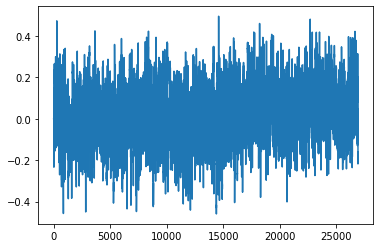

In [36]:
plt.plot(CMF)

In [37]:

clean = pd.concat((raw[['timestamp', 'unix', 'close', 'volume', 'trades']], extracted_features), axis = 1)
clean = clean[72:]
clean

,timestamp,unix,close,volume,trades,volatility,return,EWM72,EWM12,MACD,CMF,RSI72,RSI12
72,2018-04-20 04:00:00,1524196800,0.27015,4.285637e+06,2603,0.00938,-0.00837,0.261416,0.268196,0.006780,0.099649,52.856987,49.266215
73,2018-04-20 05:00:00,1524200400,0.27396,3.493162e+06,2004,0.00870,0.00381,0.261652,0.268524,0.006872,0.024149,54.404260,54.464279
74,2018-04-20 06:00:00,1524204000,0.27744,2.122572e+06,1144,0.00529,0.00348,0.261946,0.269031,0.007085,0.073527,55.749490,58.682429
75,2018-04-20 07:00:00,1524207600,0.27700,2.086070e+06,1389,0.00406,-0.00044,0.262224,0.269484,0.007260,0.119550,55.539392,57.942098
76,2018-04-20 08:00:00,1524211200,0.27593,2.036844e+06,1182,0.00484,-0.00107,0.262475,0.269850,0.007375,0.085068,55.027983,56.065659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26930,2021-05-16 17:00:00,1621184400,2.23510,7.546962e+07,167738,0.10000,-0.00280,1.892234,2.255826,0.363593,-0.218151,55.683167,41.954134
26931,2021-05-16 18:00:00,1621188000,2.12760,5.547259e+07,159310,0.13380,-0.10750,1.894489,2.248629,0.354141,-0.127484,53.089065,32.118410
26932,2021-05-16 19:00:00,1621191600,2.09120,1.150937e+08,223820,0.14510,-0.03640,1.896373,2.239794,0.343420,-0.162580,52.253187,29.558659
26933,2021-05-16 20:00:00,1621195200,2.02620,8.895247e+07,181026,0.11280,-0.06500,1.897617,2.227806,0.330188,-0.122142,50.804657,25.586274


In [38]:
correlation_matrix = pd.concat((raw[72:], extracted_features[72:]), axis = 1).corr().round(5)
correlation_matrix.to_csv("correlation_matrix.csv")

In [39]:
correlation_matrix.round(5)

,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av,unix,volatility,return,EWM72,EWM12,MACD,CMF,RSI72,RSI12
open,1.00000,0.99989,0.99986,0.99981,0.32264,0.68818,0.72606,0.32098,0.67532,0.47889,0.77819,0.02221,0.99451,0.99902,0.56046,0.12628,0.13755,0.05016
high,0.99989,1.00000,0.99979,0.99991,0.32823,0.69478,0.73207,0.32706,0.68245,0.47898,0.78396,0.03323,0.99419,0.99890,0.56247,0.12655,0.13892,0.05216
low,0.99986,0.99979,1.00000,0.99987,0.31768,0.68277,0.72078,0.31659,0.67056,0.47881,0.77101,0.03262,0.99466,0.99895,0.55799,0.12601,0.13773,0.05183
close,0.99981,0.99991,0.99987,1.00000,0.32390,0.68990,0.72744,0.32305,0.67793,0.47898,0.77858,0.04193,0.99440,0.99891,0.56033,0.12620,0.13892,0.05320
volume,0.32264,0.32823,0.31768,0.32390,1.00000,0.65721,0.68938,0.99306,0.65452,0.42696,0.57309,0.07409,0.29597,0.31531,0.36806,0.16974,0.29035,0.14838
quote_av,0.68818,0.69478,0.68277,0.68990,0.65721,1.00000,0.96436,0.66263,0.99739,0.37761,0.90244,0.10865,0.65478,0.67763,0.59130,0.12573,0.18533,0.10016
trades,0.72606,0.73207,0.72078,0.72744,0.68938,0.96436,1.00000,0.69169,0.95928,0.43288,0.90931,0.09239,0.69548,0.71680,0.59502,0.14521,0.20558,0.10490
tb_base_av,0.32098,0.32706,0.31659,0.32305,0.99306,0.66263,0.69169,1.00000,0.66462,0.41760,0.56984,0.11474,0.29426,0.31343,0.36534,0.17472,0.30151,0.17898
tb_quote_av,0.67532,0.68245,0.67056,0.67793,0.65452,0.99739,0.95928,0.66462,1.00000,0.36958,0.88906,0.15400,0.64202,0.66457,0.58133,0.12560,0.18665,0.10853
unix,0.47889,0.47898,0.47881,0.47898,0.42696,0.37761,0.43288,0.41760,0.36958,1.00000,0.37758,0.01987,0.47085,0.47825,0.32414,0.19485,0.22755,0.10279


In [40]:
# Calculating the amount of instances (rows) within the six month period for the three timeframes (1m, 1h, 1d). 
# The calculation of timeframes_1d is slightly different while the first day only consists out of 1 hour of data.
period_unix = clean['unix'].iloc[-1] - clean['unix'].iloc[0]
timeframes_1h = int(period_unix / 60 / 60)


# Creating variables containing empty vectors that correspond with the timeframes (1m, 1h, 1d). 
tweets_1h = np.zeros(timeframes_1h)
reddit_1h = np.zeros(timeframes_1h)

r_score = np.zeros(timeframes_1h)
t_likes = np.zeros(timeframes_1h)
t_retweets = np.zeros(timeframes_1h)
t_replies = np.zeros(timeframes_1h)

r_CumPositive = np.zeros(timeframes_1h)
r_CumNegative = np.zeros(timeframes_1h)
r_CumCompound = np.zeros(timeframes_1h)

t_CumPositive = np.zeros(timeframes_1h)
t_CumNegative = np.zeros(timeframes_1h)
t_CumCompound = np.zeros(timeframes_1h)


# All document names of the scraped data
tweets_names_list = ['T_ada_march_18.csv', 'T_ada_april_18.csv', 'T_ada_may_18.csv', 'T_ada_june_18.csv', 'T_ada_july_18.csv', 'T_ada_august_18.csv',\
                  'T_ada_september_18.csv', 'T_ada_october_18.csv', 'T_ada_november_18.csv', 'T_ada_december_18.csv', 'T_ada_january_19.csv',\
                  'T_ada_february_19.csv', 'T_ada_march_19.csv', 'T_ada_april_19.csv', 'T_ada_may_19.csv', 'T_ada_june_19.csv', 'T_ada_july_19.csv',\
                  'T_ada_august_19.csv', 'T_ada_september_19.csv', 'T_ada_october_19.csv', 'T_ada_november_19.csv', 'T_ada_december_19.csv',\
                  'T_ada_january_20.csv', 'T_ada_febrauri_20.csv', 'T_ada_march_20.csv', 'T_ada_april_20.csv', 'T_ada_may_20.csv', 'T_ada_june_20.csv',\
                  'T_ada_july_20.csv', 'T_ada_august_20.csv', 'T_ada_september_20.csv', 'T_ada_october_20.csv', 'T_ada_november_20.csv',\
                  'T_ada_december_20.csv', 'T_ada_january_21.csv', 'T_ada_february_21.csv', 'T_ada_march_21.csv', 'T_ada_april_21.csv', 'T_ada_may_21.csv']
reddit_names_list = ['R_ada_march_18.csv', 'R_ada_april_18.csv', 'R_ada_may_18.csv', 'R_ada_june_18.csv', 'R_ada_july_18.csv', 'R_ada_august_18.csv',\
                  'R_ada_september_18.csv', 'R_ada_october_18.csv', 'R_ada_november_18.csv', 'R_ada_december_18.csv','R_ada_january_19.csv',\
                  'R_ada_febrauri_19.csv', 'R_ada_march_19.csv', 'R_ada_april_19.csv', 'R_ada_may_19.csv', 'R_ada_june_19.csv', 'R_ada_july_19.csv',\
                  'R_ada_august_19.csv', 'R_ada_september_19.csv', 'R_ada_october_19.csv', 'R_ada_november_19.csv', 'R_ada_december_19.csv',\
                  'R_ada_january_20.csv', 'R_ada_febrauri_20.csv', 'R_ada_march_20.csv', 'R_ada_april_20.csv', 'R_ada_may_20.csv', 'R_ada_june_20.csv',\
                  'R_ada_july_20.csv', 'R_ada_august_20.csv', 'R_ada_september_20.csv', 'R_ada_october_20.csv', 'R_ada_november_20.csv',\
                  'R_ada_december_20.csv', 'R_ada_january_21.csv', 'R_ada_february_21.csv', 'R_ada_march_21.csv','R_ada_april_21.csv', 'R_ada_may_21.csv']

In [41]:
# Opening the individual Reddit CSV files and adding 1 to the corresponding timeframe for every comment.
# In addition adding the sentiment scores to the corresponding time
for name in reddit_names_list:
    data = pd.read_csv(name)
    for i, x in enumerate(data["created_utc"]):
        x = (x - clean['unix'].iloc[0]) // (60*60)
        reddit_1h[x] += 1
        r_score[x] = data["score"].iloc[i]
        
        r_CumPositive[x] += data['positive'].iloc[i]
        r_CumNegative[x] += data['negative'].iloc[i]
        r_CumCompound[x] += data['compound'].iloc[i]


# Opening the individual Twitter CSV files and adding 1 to the corresponding timeframe (1m) for every Tweet.
# In addition adding the sentiment scores to the corresponding time
for name in tweets_names_list:
    data = pd.read_csv(name)
    for i, x in enumerate(data["date"]):
        x = int((pd.Timestamp(x) - pd.Timestamp("1970-01-01 00:00:00+00:00")) // pd.Timedelta('1s'))
        x = (x - clean['unix'].iloc[0]) // (60*60)
        tweets_1h[x] += 1
        t_likes[x] = data["likeCount"].iloc[i]
        t_retweets[x] = data["retweetCount"].iloc[i]
        t_replies[x] = data["replyCount"].iloc[i]
        
        t_CumPositive[x] += data['positive'].iloc[i]
        t_CumNegative[x] += data['negative'].iloc[i]
        t_CumCompound[x] += data['compound'].iloc[i]


In [43]:
new_tweets = np.zeros(len(clean))
new_reddit = np.zeros(len(clean))
new_likes = np.zeros(len(clean))
new_retweets = np.zeros(len(clean))
new_replies = np.zeros(len(clean))
new_score = np.zeros(len(clean))
new_t_CumPositive = np.zeros(len(clean))
new_t_CumNegative = np.zeros(len(clean))
new_t_CumCompound = np.zeros(len(clean))
new_r_CumPositive = np.zeros(len(clean))
new_r_CumNegative = np.zeros(len(clean))
new_r_CumCompound = np.zeros(len(clean))

In [44]:
# Because of the missing rows because of maintenance, we also got to remove the corresponding social media posts.
epoch = clean['unix'].iloc[0]
count = 0
for i, tweets_vol in enumerate(tweets_1h):
    if count >= len(clean):
        break
    if epoch == clean["unix"].iloc[count]:
        new_tweets[count] = tweets_vol 
        new_reddit[count] = reddit_1h[i]
        new_likes[count] = t_likes[i]
        new_retweets[count] = t_retweets[i]
        new_replies[count] = t_replies[i]
        new_score[count] = r_score[i]
        new_t_CumPositive[count] = t_CumPositive[i]
        new_t_CumNegative[count] = t_CumNegative[i]
        new_t_CumCompound[count] = t_CumCompound[i]
        new_r_CumPositive[count] = r_CumPositive[i]
        new_r_CumNegative[count] = r_CumNegative[i]
        new_r_CumCompound[count] = r_CumCompound[i]
        
        count +=1
    epoch += (60 * 60)
    
clean["tweets_vol"] = new_tweets
clean["reddit_vol"] = new_reddit    
clean["reddit_score"] = new_score
clean["tweets_replies"] = new_replies
clean["tweets_retweets"] = new_retweets
clean["tweets_likes"] = new_likes
clean["t_CumPositive"] = new_t_CumPositive
clean["t_CumNegative"] = new_t_CumNegative
clean["t_CumCompound"] = new_t_CumCompound
clean["r_CumPositive"] = new_r_CumPositive
clean["r_CumNegative"] = new_r_CumNegative
clean["r_CumCompound"] = new_r_CumCompound    
clean   

,timestamp,unix,close,volume,trades,volatility,return,EWM72,EWM12,MACD,...,reddit_score,tweets_replies,tweets_retweets,tweets_likes,t_CumPositive,t_CumNegative,t_CumCompound,r_CumPositive,r_CumNegative,r_CumCompound
72,2018-04-20 04:00:00,1524196800,0.27015,4.285637e+06,2603,0.00938,-0.00837,0.261416,0.268196,0.006780,...,2.0,0.0,0.0,0.0,2.559,0.979,5.4073,0.390,0.000,1.2783
73,2018-04-20 05:00:00,1524200400,0.27396,3.493162e+06,2004,0.00870,0.00381,0.261652,0.268524,0.006872,...,2.0,0.0,0.0,0.0,2.028,1.228,3.9199,1.106,0.236,2.7209
74,2018-04-20 06:00:00,1524204000,0.27744,2.122572e+06,1144,0.00529,0.00348,0.261946,0.269031,0.007085,...,1.0,0.0,0.0,0.0,3.451,1.100,9.9325,0.057,0.059,-0.0516
75,2018-04-20 07:00:00,1524207600,0.27700,2.086070e+06,1389,0.00406,-0.00044,0.262224,0.269484,0.007260,...,7.0,0.0,0.0,0.0,3.006,1.117,7.7130,1.534,0.215,3.4190
76,2018-04-20 08:00:00,1524211200,0.27593,2.036844e+06,1182,0.00484,-0.00107,0.262475,0.269850,0.007375,...,1.0,0.0,0.0,0.0,1.533,1.050,3.7688,1.015,0.221,0.3628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26930,2021-05-16 17:00:00,1621184400,2.23510,7.546962e+07,167738,0.10000,-0.00280,1.892234,2.255826,0.363593,...,3.0,0.0,0.0,0.0,2.688,1.076,8.8898,0.124,0.398,-0.3327
26931,2021-05-16 18:00:00,1621188000,2.12760,5.547259e+07,159310,0.13380,-0.10750,1.894489,2.248629,0.354141,...,1.0,0.0,0.0,2.0,2.358,1.180,6.7690,0.341,0.070,0.1531
26932,2021-05-16 19:00:00,1621191600,2.09120,1.150937e+08,223820,0.14510,-0.03640,1.896373,2.239794,0.343420,...,1.0,0.0,0.0,2.0,2.606,1.418,6.1938,1.683,0.520,2.4381
26933,2021-05-16 20:00:00,1621195200,2.02620,8.895247e+07,181026,0.11280,-0.06500,1.897617,2.227806,0.330188,...,1.0,0.0,0.0,0.0,1.545,1.204,3.2239,0.120,0.000,0.4576


In [45]:
# Explanatory data analysis showed that Reddit's dataset contains several periods of missing instances.
# Through imputation with the EWMA we will cover for these missing instances.

reddit_vol = clean['reddit_vol'].iloc[22000:]
reddit_score = clean['reddit_score'].iloc[22000:]
reddit_pos = clean['r_CumPositive'].iloc[22000:]
reddit_neg = clean['r_CumNegative'].iloc[22000:]
reddit_com = clean['r_CumCompound'].iloc[22000:]

missing_inst_vol = reddit_vol == 0
missing_inst_score = reddit_score == 0
missing_inst_pos = reddit_pos == 0
missing_inst_neg = reddit_neg == 0
missing_inst_com = reddit_com == 0

vol_EMA = clean['reddit_vol'].ewm(72).mean()[22000:]
score_EMA = clean['reddit_score'].ewm(72).mean()[22000:]
pos_EMA = clean['r_CumPositive'].ewm(72).mean()[22000:]
neg_EMA = clean['r_CumNegative'].ewm(72).mean()[22000:]
com_EMA = clean['r_CumCompound'].ewm(72).mean()[22000:]

reddit_vol[missing_inst_vol] = vol_EMA[missing_inst_vol]
reddit_score[missing_inst_score] = score_EMA[missing_inst_score]
reddit_pos[missing_inst_pos] = pos_EMA[missing_inst_pos]
reddit_neg[missing_inst_neg] = neg_EMA[missing_inst_neg]
reddit_com[missing_inst_com] = com_EMA[missing_inst_com]

clean['reddit_vol'].iloc[22000:] = reddit_vol
clean['reddit_score'].iloc[22000:] = reddit_vol
clean['r_CumPositive'].iloc[22000:] = reddit_vol
clean['r_CumNegative'].iloc[22000:] = reddit_vol
clean['r_CumCompound'].iloc[22000:] = reddit_vol

clean

C:\Users\lward\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,timestamp,unix,close,volume,trades,volatility,return,EWM72,EWM12,MACD,...,reddit_score,tweets_replies,tweets_retweets,tweets_likes,t_CumPositive,t_CumNegative,t_CumCompound,r_CumPositive,r_CumNegative,r_CumCompound
72,2018-04-20 04:00:00,1524196800,0.27015,4.285637e+06,2603,0.00938,-0.00837,0.261416,0.268196,0.006780,...,2.00000,0.0,0.0,0.0,2.559,0.979,5.4073,0.39000,0.00000,1.27830
73,2018-04-20 05:00:00,1524200400,0.27396,3.493162e+06,2004,0.00870,0.00381,0.261652,0.268524,0.006872,...,2.00000,0.0,0.0,0.0,2.028,1.228,3.9199,1.10600,0.23600,2.72090
74,2018-04-20 06:00:00,1524204000,0.27744,2.122572e+06,1144,0.00529,0.00348,0.261946,0.269031,0.007085,...,1.00000,0.0,0.0,0.0,3.451,1.100,9.9325,0.05700,0.05900,-0.05160
75,2018-04-20 07:00:00,1524207600,0.27700,2.086070e+06,1389,0.00406,-0.00044,0.262224,0.269484,0.007260,...,7.00000,0.0,0.0,0.0,3.006,1.117,7.7130,1.53400,0.21500,3.41900
76,2018-04-20 08:00:00,1524211200,0.27593,2.036844e+06,1182,0.00484,-0.00107,0.262475,0.269850,0.007375,...,1.00000,0.0,0.0,0.0,1.533,1.050,3.7688,1.01500,0.22100,0.36280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26930,2021-05-16 17:00:00,1621184400,2.23510,7.546962e+07,167738,0.10000,-0.00280,1.892234,2.255826,0.363593,...,7.00000,0.0,0.0,0.0,2.688,1.076,8.8898,7.00000,7.00000,7.00000
26931,2021-05-16 18:00:00,1621188000,2.12760,5.547259e+07,159310,0.13380,-0.10750,1.894489,2.248629,0.354141,...,4.00000,0.0,0.0,2.0,2.358,1.180,6.7690,4.00000,4.00000,4.00000
26932,2021-05-16 19:00:00,1621191600,2.09120,1.150937e+08,223820,0.14510,-0.03640,1.896373,2.239794,0.343420,...,9.00000,0.0,0.0,2.0,2.606,1.418,6.1938,9.00000,9.00000,9.00000
26933,2021-05-16 20:00:00,1621195200,2.02620,8.895247e+07,181026,0.11280,-0.06500,1.897617,2.227806,0.330188,...,4.00000,0.0,0.0,0.0,1.545,1.204,3.2239,4.00000,4.00000,4.00000


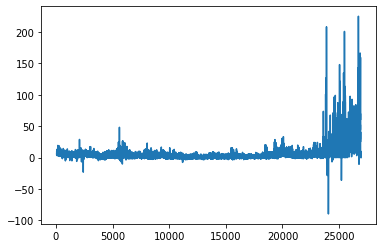

In [49]:
plt.plot(clean['t_CumCompound'])

In [51]:
clean = clean[clean["unix"] < 1621198800]
clean.to_csv("clean_all.csv")